In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#wczytaj zbiór digits i podziel go na X i y
digits = load_digits()
X = digits.data
y = digits.target


In [3]:
#podziel dane na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
#PCA wyznaczone dla 5 komponentów
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Wyjaśniona wariancja:\n", explained_variance)


Wyjaśniona wariancja:
 [0.15185124 0.13576321 0.11816018 0.08339218 0.05808232]


In [5]:
#stwórz klasyfikator kNN dla 3 sąsiadów, naucz go na zbiorze X_train_pca i zrób predykcję na X_test_pca
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)


In [6]:
#stwórz klasyfikator kNN dla 3 sąsiadów, naucz go na zbiorze X_train i zrób predykcję na X_test
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

In [7]:
#policz accuracy dla obu klasyfikatorów
accuracy_pca = accuracy_score(y_test, y_pred)
accuracy_full = accuracy_score(y_test, y_pred2)

print(f"Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: {accuracy_pca:.2f}")
print(f"Dokładność klasyfikacji na pełnych danych: {accuracy_full:.2f}")


Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.92
Dokładność klasyfikacji na pełnych danych: 0.99


In [13]:
#wykorzystując pętlę for sprawdź skuteczność klasyfikacji za pomocą kNN i PCA dla liczby komponentów od 1 do 64
#PCA wyznaczone dla 5 komponentów
pca = PCA(n_components=64) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
for i in range(1,len(explained_variance)+1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred)
    print(f"Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: {accuracy_pca:.2f}, komponentów: {i}")

Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.33, komponentów: 1
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.57, komponentów: 2
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.72, komponentów: 3
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.85, komponentów: 4
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.92, komponentów: 5
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.93, komponentów: 6
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.96, komponentów: 7
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.96, komponentów: 8
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.97, komponentów: 9
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.97, komponentów: 10
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.98, komponentów: 11
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.98, kompo

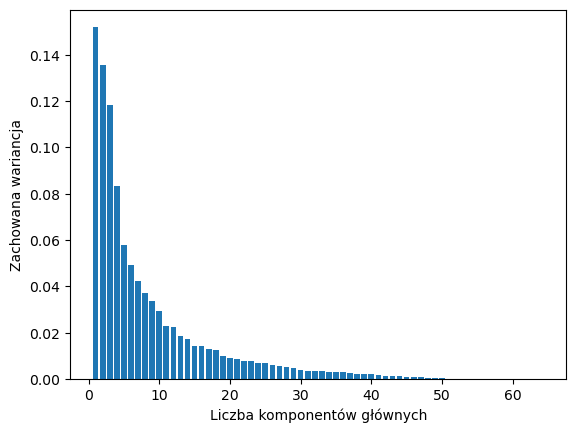

In [12]:
x_axis_values = list(range(1,len(explained_variance)+1))
plt.bar(x_axis_values, explained_variance)
plt.xlabel("Liczba komponentów głównych")
plt.ylabel("Zachowana wariancja")
plt.show()